In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from data_utils import load_CIFAR10
from softmax_without_regression import Softmax

In [2]:
def min_max_scaler(X):
    min1 = 0
    max1 = 255
    return (X-min1)/(max1-min1)

def pre_dataset():
    cifar10_dir = 'D:/dataset/cifar-10-python/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    num_train = 48000
    num_val = 2000

    mask = range(num_train, num_train + num_val)
    X_val = X_train[mask]
    y_val = y_train[mask]
    X_train = X_train[:num_train]
    y_train = y_train[:num_train]

    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))

    X_train = min_max_scaler(X_train)
    X_val = min_max_scaler(X_val)
    X_test = min_max_scaler(X_test)

    # add a parameter for W
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])

    return X_train, y_train, X_test, y_test, X_val, y_val

In [3]:
def get_softmax_model(X, y,learning_rate,batch_num,num_iter):
    softmax = Softmax()
    loss_history = softmax.train(X, y, learning_rate,batch_num,num_iter)
    VisualizeLoss(loss_history)
    return softmax

def VisualizeLoss(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Iteration number')
    plt.ylabel('Loss value')
    plt.show()

In [4]:
def pca_dim_reduction(X_train,X_val,X_test,ratio=0.95): #降维
    pca = PCA(n_components=ratio)
    pca.fit(X_train)
    X_train_transformed = pca.transform(X_train)
    X_val_transformed = pca.transform(X_val)
    X_test_transformed = pca.transform(X_test)
    return X_train_transformed,X_val_transformed,X_test_transformed

#### PCA 降维

In [5]:
X_train, y_train, X_test, y_test, X_val, y_val = pre_dataset()

D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_1
D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_2
D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_3
D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_4
D:/dataset/cifar-10-python/cifar-10-batches-py\data_batch_5
D:/dataset/cifar-10-python/cifar-10-batches-py\test_batch


In [6]:
X_train,X_val,X_test = pca_dim_reduction(X_train,X_val,X_test)

##### 保留95%的信息，降维后数据从3072维降到了 217维

In [7]:
X_train.shape

(48000, 217)

##### 准确率上不去了

##### 0.0005 100000 =》 acc：0.406
##### 500 ,0.0001,500000 -》acc：.405700

Iteration 0 / 2000: loss 2.305116
Iteration 500 / 2000: loss 2.076743
Iteration 1000 / 2000: loss 2.120088
Iteration 1500 / 2000: loss 2.093258


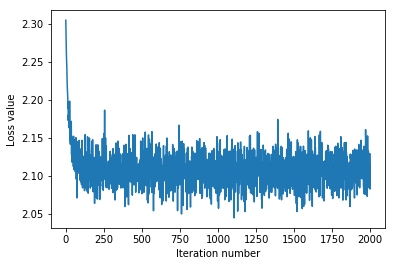

learning_rate: 0.010000;batch_num: 500; Accuracy: 0.322100


In [8]:
batch_nums = [500]
learning_rates = [0.01]
num_iter = 2000
for learning_rate in learning_rates:
    for batch_num in batch_nums:
        softmax = get_softmax_model(X_train, y_train,learning_rate,batch_num,num_iter)
        y_pred = softmax.predict(X_test)
        acc = np.mean(y_pred == y_test)
        print('learning_rate: %f;batch_num: %d; Accuracy: %f' % (learning_rate,batch_num,acc))